In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.conv_learner import *

In [24]:
PATH = 'data/dogbreed/'
#f_model = resnet50
f_model=resnext101_64

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
! ls {PATH}

labels.csv	sample_submission.csv	   test.zip  train.zip
labels.csv.zip	sample_submission.csv.zip  tmp
models		test			   train


In [6]:
!wc -l {PATH}labels.csv

10223 data/dogbreed/labels.csv


In [7]:
!ls {PATH}train|wc -l

10222


In [8]:
files = os.listdir(f'{PATH}train')[:5]
files

['d8275152fe9027835bec0c405d131a2b.jpg',
 '44b4684cac2f73ba81b6ed86e45244ad.jpg',
 'bc218eeb424cf93092b0a0b23035bbad.jpg',
 'eba058daca887257dc71bfd2a0267d29.jpg',
 '92d23591a857f9adb0024d587683a1cd.jpg']

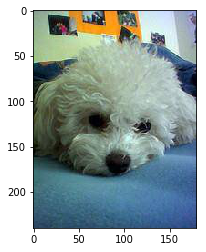

In [9]:
img = plt.imread(f'{PATH}/train/{files[0]}')
plt.imshow(img);

In [10]:
! head -6 {PATH}labels.csv

id,breed
000bec180eb18c7604dcecc8fe0dba07,boston_bull
001513dfcb2ffafc82cccf4d8bbaba97,dingo
001cdf01b096e06d78e9e5112d419397,pekinese
00214f311d5d2247d5dfe4fe24b2303d,bluetick
0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [11]:
label_csv = f'{PATH}labels.csv'
n = len(list(open(label_csv)))-1
val_idxs = get_cv_idxs(n)

In [11]:
n,len(val_idxs)

(10222, 2044)

In [12]:
lable_df =pd.read_csv(f'{PATH}labels.csv')

In [13]:
lable_df.pivot_table(index='breed',aggfunc=len).sort_values('id',ascending=False)

,id
breed,
scottish_deerhound,126
maltese_dog,117
afghan_hound,116
entlebucher,115
bernese_mountain_dog,114
shih-tzu,112
great_pyrenees,111
pomeranian,111
basenji,110


In [13]:
def get_data(sz,bs=50):
    tfms = tfms_from_model(f_model, sz, aug_tfms=transforms_side_on, max_zoom=1.05)
    return ImageClassifierData.from_csv(PATH, 'train', label_csv,bs, tfms=tfms,
                    suffix='.jpg', val_idxs=val_idxs, test_name='test')

In [17]:
sz=224

In [18]:
data = get_data(sz)

In [25]:
data.classes

['affenpinscher',
 'afghan_hound',
 'african_hunting_dog',
 'airedale',
 'american_staffordshire_terrier',
 'appenzeller',
 'australian_terrier',
 'basenji',
 'basset',
 'beagle',
 'bedlington_terrier',
 'bernese_mountain_dog',
 'black-and-tan_coonhound',
 'blenheim_spaniel',
 'bloodhound',
 'bluetick',
 'border_collie',
 'border_terrier',
 'borzoi',
 'boston_bull',
 'bouvier_des_flandres',
 'boxer',
 'brabancon_griffon',
 'briard',
 'brittany_spaniel',
 'bull_mastiff',
 'cairn',
 'cardigan',
 'chesapeake_bay_retriever',
 'chihuahua',
 'chow',
 'clumber',
 'cocker_spaniel',
 'collie',
 'curly-coated_retriever',
 'dandie_dinmont',
 'dhole',
 'dingo',
 'doberman',
 'english_foxhound',
 'english_setter',
 'english_springer',
 'entlebucher',
 'eskimo_dog',
 'flat-coated_retriever',
 'french_bulldog',
 'german_shepherd',
 'german_short-haired_pointer',
 'giant_schnauzer',
 'golden_retriever',
 'gordon_setter',
 'great_dane',
 'great_pyrenees',
 'greater_swiss_mountain_dog',
 'groenendael',


In [20]:
x,y = next(iter(data.val_dl))

In [23]:
x.shape,y.shape

(torch.Size([50, 3, 224, 224]), torch.Size([50]))

In [31]:
y[:5]


 19
 15
  7
 99
 73
[torch.cuda.LongTensor of size 5 (GPU 0)]

In [25]:
learn = ConvLearner.pretrained(f_model, data,precompute=True)

100%|██████████| 208/208 [04:00<00:00,  1.15s/it]


 88%|████████▊ | 144/164 [00:02<00:00, 54.33it/s, loss=12.9]


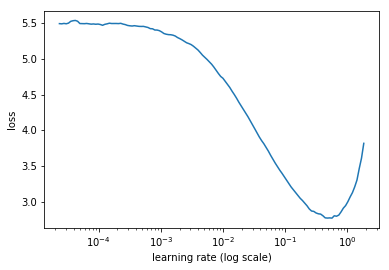

In [32]:
lrf=learn.lr_find()
learn.sched.plot()

In [20]:
lr=1e-2

In [21]:
learn.fit(lr, 5, cycle_len=1)

epoch      trn_loss   val_loss   accuracy                   
    0      1.51006    0.975036   0.827789  
    1      0.817258   0.613503   0.856654                    
    2      0.581231   0.51525    0.863992                    
    3      0.477012   0.501731   0.867417                    
    4      0.422231   0.495173   0.863014                    



[array([0.49517]), 0.8630136938477683]

In [23]:
learn.precompute=False

In [36]:
learn.fit(lr, 5, cycle_len=1)

epoch      trn_loss   val_loss   accuracy                    
    0      0.503602   0.438334   0.863503  
    1      0.454944   0.421049   0.873777                    
    2      0.437229   0.417834   0.868395                    
    3      0.396276   0.410292   0.874755                    
    4      0.379508   0.420735   0.874266                    



[array([0.42073]), 0.8742661482550627]

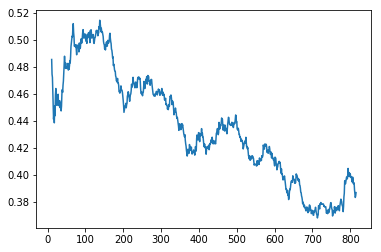

In [37]:
learn.sched.plot_loss()

In [38]:
learn.save(f'{sz}')

In [41]:
sz=299

In [40]:
learn.set_data(get_data(sz))
learn.freeze()
learn.fit(lr, 3, cycle_len=1)

epoch      trn_loss   val_loss   accuracy                    
    0      0.372052   0.400912   0.873777  
    1      0.355101   0.396309   0.879648                    
    2      0.326813   0.381602   0.879648                    



[array([0.3816]), 0.8796477419872807]

In [42]:
learn.fit(lr, 3, cycle_len=1,cycle_mult=2)

epoch      trn_loss   val_loss   accuracy                    
    0      0.313933   0.393729   0.875734  
    1      0.304108   0.395699   0.871331                    
    2      0.255195   0.391951   0.875734                    
    3      0.280331   0.410833   0.868885                    
    4      0.261435   0.395837   0.873777                    
    5      0.242325   0.39321    0.875245                    
    6      0.226721   0.394609   0.875734                    



[array([0.39461]), 0.8757338455628509]

 Model is highlighy overfitting.Now lets train it using differen architecture "resnext101_64"

In [33]:
f_model=resnext101_64
sz=224

In [34]:
data = get_data(sz)

In [35]:
learn = ConvLearner.pretrained(f_model, data,precompute=True,ps=0.5)

 92%|█████████▏| 151/164 [00:02<00:00, 65.43it/s, loss=13.6]


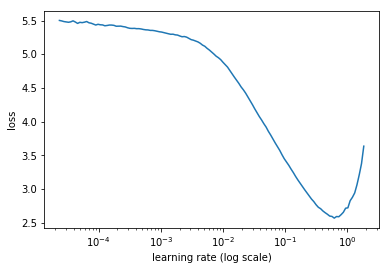

In [36]:
lrf=learn.lr_find()
learn.sched.plot()

In [37]:
learn.fit(lr, 5, cycle_len=1)

epoch      trn_loss   val_loss   accuracy                   
    0      1.35697    0.706419   0.889922  
    1      0.670398   0.412841   0.914873                    
    2      0.493146   0.348229   0.918787                    
    3      0.394892   0.306547   0.919276                    
    4      0.349542   0.300095   0.922701                    



[array([0.3001]), 0.9227005778693407]

In [38]:
learn.precompute=False

In [39]:
learn.fit(lr, 3, cycle_len=1)

epoch      trn_loss   val_loss   accuracy                    
    0      0.378775   0.2462     0.926125  
    1      0.340799   0.233339   0.929061                    
    2      0.304206   0.228372   0.932975                    



[array([0.22837]), 0.9329745536214451]

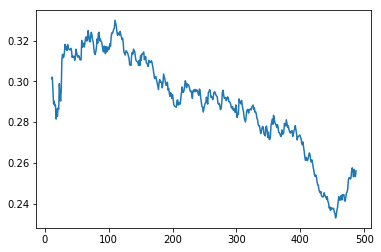

In [53]:
learn.sched.plot_loss()

In [40]:
sz

224

In [41]:
learn.save(f'{sz}_resnext101_64')

In [42]:
learn.load(f'{sz}_resnext101_64')

In [43]:
sz=299

In [44]:
learn.set_data(get_data(sz))
learn.freeze()
learn.fit(lr, 3, cycle_len=1)

epoch      trn_loss   val_loss   accuracy                    
    0      0.310409   0.22726    0.932485  
    1      0.291706   0.220842   0.928082                    
    2      0.271668   0.218238   0.932485                    



[array([0.21824]), 0.9324853145562972]

In [45]:
learn.save(f'{sz}_resnext101_64')

In [46]:
learn.load(f'{sz}_resnext101_64')

In [47]:
learn.fit(lr, 2, cycle_len=2)

epoch      trn_loss   val_loss   accuracy                    
    0      0.24838    0.211844   0.935421  
    1      0.235417   0.20875    0.931996                    
    2      0.237945   0.208559   0.930039                    
    3      0.209447   0.205215   0.931507                    



[array([0.20521]), 0.9315068419082291]

In [48]:
learn.fit(lr, 2, cycle_len=1,cycle_mult=2)

epoch      trn_loss   val_loss   accuracy                    
    0      0.219311   0.20707    0.932975  
    1      0.21323    0.211783   0.934442                    
    2      0.181917   0.208114   0.932485                    



[array([0.20811]), 0.9324853174723757]

In [49]:
log_pred,y=learn.TTA()

In [51]:
log_pred.shape

(5, 2044, 120)

In [53]:
probs = np.mean(np.exp(log_pred),0)

In [54]:
probs.shape

(2044, 120)

In [57]:
metrics.log_loss(y, probs)

0.19961237297923115

In [61]:
test_pred,_=learn.TTA(is_test=True)

In [62]:
test_pred.shape

(5, 10357, 120)

In [64]:
test_prob = np.mean(np.exp(test_pred),0)

In [65]:
test_prob.shape

(10357, 120)

In [81]:
df=pd.DataFrame(test_prob)

In [82]:
df.columns=data.classes

In [83]:
df.insert(0,'id',[o[5:-4] for o in data.test_ds.fnames])

In [84]:
df.head()

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,...,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,de084b830010b6107215fef5d4a75b94,4.823706e-07,3.422447e-07,8.168678e-07,1.459710e-07,9.943322e-08,1.856377e-07,8.393650e-09,5.431864e-08,8.647634e-08,...,7.512011e-09,3.598664e-08,1.115319e-07,2.508469e-07,3.076011e-07,1.155583e-07,3.339944e-07,2.355146e-06,8.378024e-08,2.594623e-08
1,6b423ca7020e70eb05732843c5d2bad1,2.276656e-06,2.995607e-05,1.699733e-06,1.668906e-06,1.202459e-07,3.913612e-08,9.077196e-08,3.930877e-08,1.248200e-07,...,4.412386e-08,7.161573e-08,9.631261e-08,3.238030e-08,1.267144e-08,9.960422e-08,7.431109e-06,7.929516e-08,1.545083e-06,7.252006e-08
2,74aa7e201e0e93e13e87b986a7d31839,3.405015e-05,6.683530e-06,1.620246e-05,2.558273e-03,2.840525e-05,8.222249e-05,4.461771e-05,2.884549e-05,2.427426e-05,...,7.730115e-06,8.062688e-05,5.540701e-05,4.123306e-05,3.605711e-05,5.186653e-05,2.048601e-04,1.192457e-04,4.042647e-01,4.630771e-06
3,a079f72193264bc5685e5d28d7372680,2.680850e-04,1.516202e-05,2.175680e-05,8.148210e-05,3.334845e-05,1.503313e-06,4.730416e-05,5.361158e-06,1.232548e-05,...,1.090585e-05,2.407220e-05,7.209404e-06,1.380957e-06,8.074937e-06,2.268809e-05,2.053478e-04,3.232469e-06,2.576206e-03,6.493174e-05
4,583f7580fa5fec1266331fcf83b76fd6,3.447695e-08,1.221965e-09,3.564753e-11,2.669039e-07,3.091093e-11,1.338640e-08,3.241508e-10,5.607505e-11,8.017561e-13,...,9.235042e-08,2.036450e-10,5.300504e-11,1.263797e-11,2.586385e-10,1.492076e-11,1.793798e-11,2.416826e-10,3.029083e-08,3.341645e-10


In [85]:
df.to_csv(f'{PATH}fastai-fastai-dog-breed-identification.gz',compression='gzip',index=False)

In [86]:
FileLink(f'{PATH}fastai-fastai-dog-breed-identification.gz')

/home/paperspace/fastai/courses/dl1/data/dogbreed/fastai-fastai-dog-breed-identification.gz